<a href="https://colab.research.google.com/github/NaithaniAR/CapstoneProject-EDA/blob/main/EDA_PROJECT_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> A. INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 

###   **1. Description of App Dataset columns**



1 App : The name of the app

2 Category : The category of the app

3 Rating : The rating of the app in the Play Store

4 Reviews : The number of reviews of the app

5 Size : The size of the app

6 Install : The number of installs of the app

7 Type : The type of the app (Free/Paid)

8 The price of the app (0 if it is Free)

9 Content Rating :The appropiate target audience of the app

10 Genres: The genre of the app

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




### **2. Load Necessary Libraries**


In [149]:
import matplotlib.pyplot as plt          
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
from datetime import datetime

warnings.filterwarnings('ignore')

%matplotlib inline

In [150]:
!pip install gitly==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

**Exploring google play store data**



In [152]:
#Reading the csv file 
df=pd.read_csv('/content/drive/MyDrive/Almabetter Projects /Google Play Store /Playstore Data /Play Store Data.csv')

In [153]:
#Top 5 rows of the dataset 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [154]:
#last rows of the dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [155]:
#No of rows and column of the dataset
df.shape

(10841, 13)

**there are a total of 10841 rows and 13 columns in this .csv file let's see the column type of our dataset**

In [156]:
#info function will tell you the count of null values and the data type of our columns
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type.**


In [157]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **B. Univariate Analysis and Data cleaning**
Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable.

 “The more data we have, the more likely we are to drown in it.” 
 —Nassim Taleb
 
 “More data beats clever algorithms, but better data beats more data.” 
 — Peter Norvig`

In [158]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###**1.Outlier treatment**

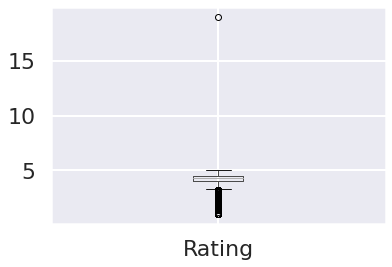

In [159]:
# Making Boxplot for rating 
df.boxplot()  

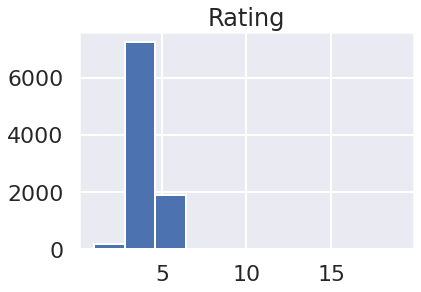

In [160]:
# Making histogram for rating 
df.hist();

In [161]:
# Print outlier 
df[df.Rating>5] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We observe that this is not an outlier, but a case of shifted values. 

In [162]:
#Converting into numpy array 
df.loc[df.App == 'Life Made WI-Fi Touchscreen Photo Frame'].to_numpy()

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [163]:
#Insert a new row with fixed values into the DataFrame
df2= pd.DataFrame(np.insert(df.values, [10472], values=['Life Made WI-Fi Touchscreen Photo Frame', np.NaN ,1.9 ,19.0 ,
                                                        '3.0M','1,000+', 'Free', 0, 'Everyone', np.NaN,
                                                        'February 11, 2018', '1.0.19', '4.0 and up'], axis=0))




In [164]:
# Dropping the 10473 row as it is no longer needed 
df2.drop([10473],inplace=True) 

# Resetting index after dropping column
df.reset_index(drop=True, inplace=True) 

In [165]:
#define column names of DataFrame
df2.columns = df.columns

In [166]:
#Index has beeen reset 
df2.iloc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10474,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10475,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


### **2. Duplicate values**


In [167]:
# df has 10841 observation before cleaning. 
df2.shape 

(10841, 13)

In [168]:
#df has 1181 duplicate App's before cleaning. 
df2[df2['App'].duplicated()]  



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10721,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10731,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10754,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [169]:
#Changing Last Updated to date time 
df2['Last Updated']=pd.to_datetime(df2['Last Updated'])
 
#Sorting values by last update before dropping duplicate values 
df2=df2.sort_values(by='Last Updated',ascending=False)

In [170]:
#Dropping duplicate values
before = len(df.index)                                                                   #Length of original Dataframe 
print('Total entries with duplicates were '+ (str(before)))
ddf=df2.drop_duplicates(subset=['App'], keep='first', inplace=False, ignore_index=True)   #Drop duplicates with a value in a specific column.
after = len(ddf.index)                                                                   #Length of duplicated Dataframe 
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 10841
Total entries after duplicates were dropped are 9660
Total 1181 entries were dropped.


In [171]:
 # we have successfully removed duplicate values and the new shape of 9660 rows × 13 columns is realised. 
 ddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,"1,000,000+",Free,0,Everyone,Shopping,2018-08-08,Varies with device,Varies with device
1,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,"50,000+",Free,0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
2,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,"50,000,000+",Free,0,Teen,Action,2018-08-08,1.1.2,4.1 and up
3,BankNordik,FINANCE,3.9,28,15M,"5,000+",Free,0,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
4,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up


In [172]:
#Checking for duplicate values 
duplicate =ddf.groupby(['App']).agg({'Category': 'count'}).reset_index()  
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head(20)

,App,Category
0,"""i DT"" Fútbol. Todos Somos Técnicos.",1
6434,My Talking Tom,1
6436,My Teacher - Classroom Play,1
6437,My Telcel,1
6438,My Tele2,1
6439,My Theme Park: RollerCoaster & Water Park Tycoon,1
6440,My Truck,1
6441,My Virtual Boyfriend,1
6442,My Vodacom SA,1
6443,My Vodafone (GR),1


### **3. Rating**

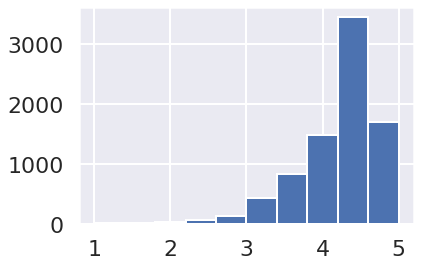

In [173]:
# Plotting histogram
ddf['Rating'].hist(); 


After treating the outlier we observe the rating values range from 1 to 5 

In [174]:
# Printing Total null values in rating  
ddf['Rating'].isnull().sum() 

1463

We observe there are 1465 null values in ratings column 

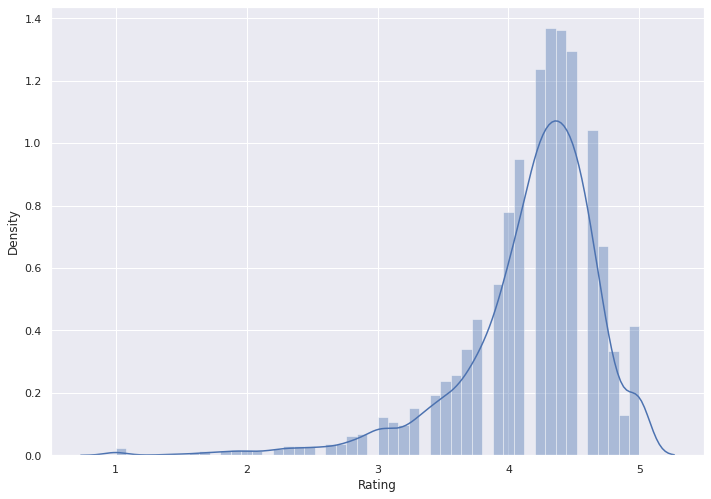

In [175]:
#Plot Before we treat null values. 
sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8


In [176]:
#Imputing null values with the median 
impute_median=ddf['Rating'].median()                     
ddf['Rating']=ddf['Rating'].fillna(impute_median)       

You may note that the data is skewed and is not a catagorical data, hence it is not recommended to use the mean/mode for replacing the missing values
Using mean/mode values for replacing missing values may not create a great model and hence it gets ruled out. 



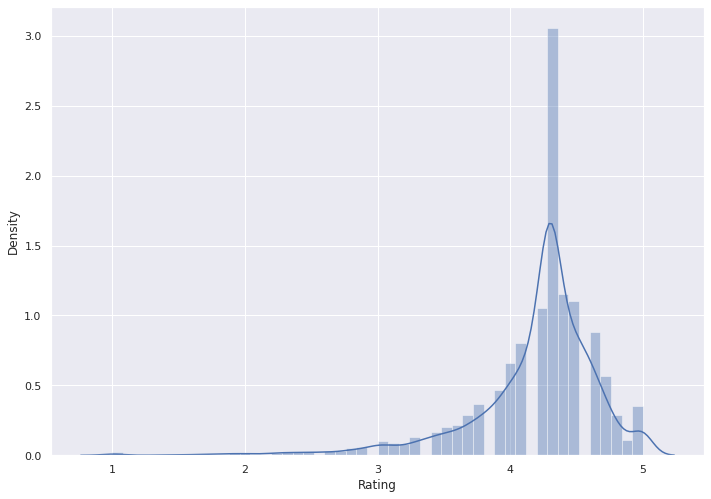

In [177]:
#Plot after we fill NaN values
sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])


we can maximum applications still lie between 3.5 to 4.8 with little to no devation from the original plot. 

### **4. Install & Price**

In [178]:
# Printing unique values price
ddf[('Installs')].unique() 

array(['1,000,000+', '50,000+', '50,000,000+', '5,000+', '1,000+',
       '10,000,000+', '10+', '5,000,000+', '500,000+', '50+', '100,000+',
       '100,000,000+', '100+', '10,000+', '0+', '1,000,000,000+',
       '500,000,000+', '500+', '5+', '1+', '0'], dtype=object)

We observe that there are unwanted characters in the dataset and the data type of the data is of object type.

In [179]:
#Printing unique values for price
ddf[('Price')].unique()  

array(['0', '$7.99', '$0.99', '$3.99', '$1.49', '$12.99', '$1.99',
       '$2.99', '$2.49', '$3.49', '$4.49', '$11.99', '$5.99', '$4.77',
       '$14.99', '$8.99', '$4.99', '$1.59', '$6.99', '$299.99', '$399.99',
       '$9.00', '$9.99', '$28.99', '$19.99', '$394.99', '$29.99', '$2.90',
       '$379.99', '$74.99', '$389.99', '$1.00', '$79.99', '$25.99',
       '$1.20', '$24.99', '$3.90', '$7.49', '$400.00', '$2.00', '$10.99',
       '$5.49', '$39.99', '$18.99', '$2.95', '$2.50', 0, '$15.99',
       '$30.99', '$3.02', '$1.76', '$154.99', '$19.40', '$3.95', '$17.99',
       '$33.99', '$10.00', '$109.99', '$3.28', '$13.99', '$37.99',
       '$14.00', '$2.59', '$8.49', '$89.99', '$16.99', '$19.90', '$46.99',
       '$4.60', '$3.61', '$4.59', '$3.04', '$3.08', '$4.29', '$1.61',
       '$1.75', '$6.49', '$1.70', '$200.00', '$15.46', '$4.80', '$1.97',
       '$1.50', '$1.96', '$2.60', '$4.84', '$5.00', '$1.29', '$4.85',
       '$2.56', '$3.88', '$1.04', '$1.26'], dtype=object)

In [180]:
# List of Symbols names to clean
chars_to_remove = ['+', ',' , '$' ] 

# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
        

Price

In [181]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 

In [182]:
ddf[('Price')].unique()

array([  0.  ,   7.99,   0.99,   3.99,   1.49,  12.99,   1.99,   2.99,
         2.49,   3.49,   4.49,  11.99,   5.99,   4.77,  14.99,   8.99,
         4.99,   1.59,   6.99, 299.99, 399.99,   9.  ,   9.99,  28.99,
        19.99, 394.99,  29.99,   2.9 , 379.99,  74.99, 389.99,   1.  ,
        79.99,  25.99,   1.2 ,  24.99,   3.9 ,   7.49, 400.  ,   2.  ,
        10.99,   5.49,  39.99,  18.99,   2.95,   2.5 ,  15.99,  30.99,
         3.02,   1.76, 154.99,  19.4 ,   3.95,  17.99,  33.99,  10.  ,
       109.99,   3.28,  13.99,  37.99,  14.  ,   2.59,   8.49,  89.99,
        16.99,  19.9 ,  46.99,   4.6 ,   3.61,   4.59,   3.04,   3.08,
         4.29,   1.61,   1.75,   6.49,   1.7 , 200.  ,  15.46,   4.8 ,
         1.97,   1.5 ,   1.96,   2.6 ,   4.84,   5.  ,   1.29,   4.85,
         2.56,   3.88,   1.04,   1.26])

Unwanted characters such as '$' has been removed.

In [183]:
# checking for null values
ddf['Price'].isnull().sum() 

0

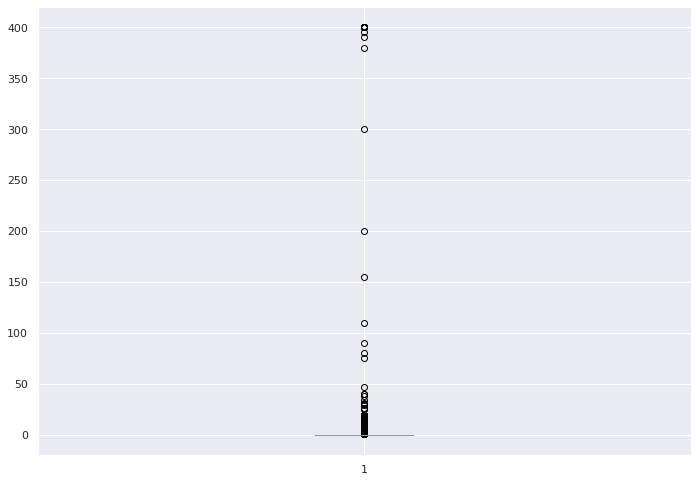

In [184]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [185]:
print(ddf[ddf.Price>30].shape)  

(29, 13)




*   We observe that there are 29 apps which are outliers for price app, since the majority of apps lie between 0-30$.
*   Scope of this project is limited to analysis we will leave it as is.




In [186]:
# Checking data for logical inconsistency, there are none present 
ddf[(ddf.Type == "Free") & (ddf.Price > 0)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Our Data is Logically Consistant

In [187]:
# Storing data sets for Future use: 
ddf_free=ddf[ddf.Price<=0.0];
ddf_paid=ddf[ddf.Price>=0.0];
ddf_Most_expensive = ddf[ddf.Price>=30.0];

Installs

In [188]:
 # Convert col to numeric Data type
 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 

In [189]:
#Checking for null values of null values 
ddf['Installs'].isnull().sum() 

0

### **5. Reviews**

In [190]:
# We observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 
ddf['Reviews'].describe() 

count     9660
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

We need to change the data type of reviews.

In [191]:
ddf = ddf.astype({'Reviews':'int'})

In [192]:
ddf['Reviews'].describe()

count    9.660000e+03
mean     2.167093e+05
std      1.830921e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.680000e+02
75%      2.943825e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Data type has been changed Successfully

In [193]:
# there are no null values in Reviews 
ddf['Reviews'].isnull().sum() 

0

In [194]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Checking for logical inconsistency

In [195]:
# Lets explore the Apps where the number of reviews are greater than the number of installs. 
print('Number of app with fake reviews:', ddf[(ddf.Reviews > ddf.Installs)].shape);     
print('\n')
print('Shape of data before removing apps with fake reviews:', ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]

Number of app with fake reviews: (11, 13)


Shape of data before removing apps with fake reviews: (9660, 13)




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
735,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
1348,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
1948,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
2017,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
2425,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64M,1,Free,0.00,Everyone,Education,2018-07-17,1.0.1,4.4 and up
7182,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,238k,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up
7669,DZ Puzzle,FAMILY,4.3,14,47M,10,Paid,0.99,Everyone,Puzzle,2017-04-22,1.2,2.3 and up
7811,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
7840,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up
7930,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up


We observe logical inconsistency in our data, as the number reviews should not  be greater than number of installs. Hence, we will remove them. 

### **6. Current Var**

In [196]:
ddf['Current Ver'].head()

0    Varies with device
1                 1.1.9
2                 1.1.2
3                 7.3.2
4                 1.9.3
Name: Current Ver, dtype: object

In [197]:
# Checking for null values, we observe 7 null values 
ddf[ddf['Current Ver'].isnull()]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4104,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
5067,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7593,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
7719,Calculate My IQ,FAMILY,4.3,44,7.2M,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7985,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up
8235,BT Master,FAMILY,4.3,0,222k,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up
8544,UFO-CQ,TOOLS,4.3,1,237k,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
9613,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up


In [198]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1056
1.0                    797
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.0.204375696            1
3.08                     1
6.18.3                   1
1.2.115                  1
0.59                     1
Name: Current Ver, Length: 2818, dtype: int64

In [199]:
#Filling the null values with mode of the attribute. 
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

### **7. Android Var**

In [200]:
# Checking for null values
ddf[ddf["Android Ver"].isnull()]   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2159,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
5369,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [201]:
# Removing 'and up' from Android Ver
ddf['Android Ver'] = ddf['Android Ver'].replace({' and up':''}, regex=True)

In [202]:
#Check the most common value in the Android version column
ddf["Android Ver"].value_counts() 

4.1                   2205
4.0.3                 1395
4.0                   1284
Varies with device     992
4.4                    818
2.3                    615
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    229
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0                      2
7.0 - 7.1.1              1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [203]:
ddf["Android Ver"].mode()

0    4.1
dtype: object

In [204]:
#Fill up the null values in the Android Version column with the above value
ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [205]:
#Check for null value in the Android version column again to cross-verify
print(ddf[ddf["Android Ver"].isnull()])
print ('\n')

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




###**8. Type**

In [206]:
# Imputing null values in Type with mode 
ddf["Type"] = ddf["Type"].fillna(ddf["Type"].mode()[0])

In [207]:
ddf["Type"].isnull().sum()

0

### **9. Size**

In [208]:
ddf['Size'].unique()

array(['Varies with device', '3.6M', '27M', '15M', '2.4M', '2.3M', '7.7M',
       '20M', '76M', '12M', '19M', '48M', '89M', '37M', '7.4M', '24M',
       '7.0M', '71M', '23M', '25M', '98M', '4.3M', '14M', '2.5M', '9.7M',
       '62M', '6.3M', '33M', '2.2M', '31M', '4.1M', '11M', '81M', '4.0M',
       '26M', '38M', '29M', '55M', '18M', '40M', '10M', '66M', '34M',
       '22M', '51M', '94M', '57M', '36M', '35M', '42M', '21M', '2.7M',
       '7.3M', '7.2M', '9.0M', '5.8M', '8.0M', '13M', '43M', '63M',
       '8.7M', '17M', '9.9M', '8.2M', '16M', '5.1M', '69M', '3.3M',
       '9.1M', '6.8M', '28M', '3.8M', '4.5M', '3.0M', '39M', '8.4M',
       '59M', '4.6M', '9.8M', '2.6M', '6.1M', '6.5M', '7.5M', '5.0M',
       '3.2M', '45M', '6.9M', '4.4M', '68M', '3.1M', '6.4M', '75M', '46M',
       '1.8M', '6.7M', '1.7M', '73M', '1.6M', '47M', '90M', '32M', '2.8M',
       '56M', '93M', '82M', '44M', '7.6M', '49M', '6.2M', '5.4M', '5.3M',
       '60M', '8.8M', '8.5M', '64M', '50M', '85M', '95M', '8.1M', 

In [209]:
#Creating a DataFrame of values with 'Varies with device' for furture use 
Size_var=ddf[ddf['Size']=='Varies with device']

In [210]:
# Size of apps in MB is denoted by 'M', stripping M from the suffix 
ddf['Size'] = ddf['Size'].map(lambda x: x.rstrip('M'))

# Apps in KB is denoted by 'K', stripping K from the suffix and dividing by 1024 to maintain uniformity in Data 
ddf['Size'] = ddf['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

# Apps with 'Varies with size' are conveted to null values to make computation easy.  
ddf['Size'] = ddf['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)


In [211]:
ddf['Size'].unique()

array([nan, '3.6', '27', '15', '2.4', '2.3', '7.7', '20', '76', '12',
       '19', '48', '89', '37', '7.4', '24', '7.0', '71', '23', '25', '98',
       '4.3', '14', '2.5', '9.7', '62', '6.3', '33', '2.2', '31', '4.1',
       '11', '81', '4.0', '26', '38', '29', '55', '18', '40', '10', '66',
       '34', '22', '51', '94', '57', '36', '35', '42', '21', '2.7', '7.3',
       '7.2', '9.0', '5.8', '8.0', '13', '43', '63', '8.7', '17', '9.9',
       '8.2', '16', '5.1', '69', '3.3', '9.1', '6.8', '28', '3.8', '4.5',
       '3.0', '39', '8.4', '59', '4.6', '9.8', '2.6', '6.1', '6.5', '7.5',
       '5.0', '3.2', '45', '6.9', '4.4', '68', '3.1', '6.4', '75', '46',
       '1.8', '6.7', '1.7', '73', '1.6', '47', '90', '32', '2.8', '56',
       '93', '82', '44', '7.6', '49', '6.2', '5.4', '5.3', '60', '8.8',
       '8.5', '64', '50', '85', '95', '8.1', '53', '78', '80', '5.7',
       '6.0', '100', '86', '97', '8.6', '4.9', '5.6', '3.4', '5.5', '7.1',
       '54', '74', '9.6', '83', '58', '96', '1.1'

Unwanted Characters are removed from the dataset

In [212]:
#Converting the 'Size' attribute to float DataType
ddf=ddf.astype({'Size':float})

### **10. Last update**

In [213]:
ddf['Last Updated'].head(5)

0   2018-08-08
1   2018-08-08
2   2018-08-08
3   2018-08-08
4   2018-08-08
Name: Last Updated, dtype: datetime64[ns]

In [214]:
# Converting from Object to date time format 
ddf['Last Updated']=pd.to_datetime(ddf['Last Updated'])

In [215]:
ddf['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

### **11.Category**

In [216]:
# Imputing null values in Type with mode 
ddf["Category"] = ddf["Category"].fillna(ddf["Category"].mode()[0])

### **12. Genre**

In [217]:
# Imputing null Genre in Type with mode 
ddf["Genres"] = ddf["Genres"].fillna(ddf["Genres"].mode()[0])

*********

# **C. Exploratory Data Analysis**
“A picture is worth a thousand words, but the way I paint I'm going to need to contact an editor. Even if I were to abstractly paint the phrase "I love you," it would be the visual equivalent of Joyce's Ulysses.
-James Lee Schmidt and Jarod Kintz”
 

### **1.Price**

1.   **Find out the number of Installs of the top most expensive app's**

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4856,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1
5437,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2
6527,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40.0,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1


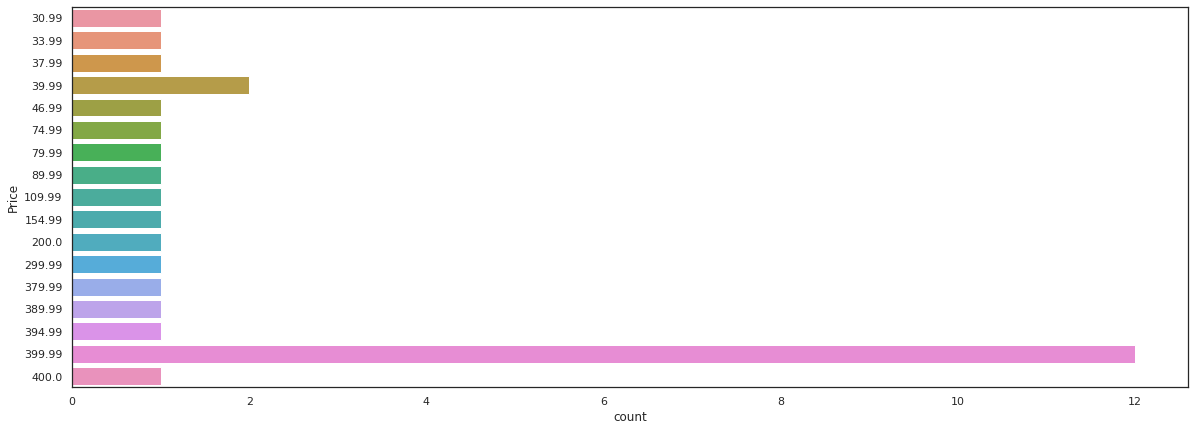

In [218]:
# Plotting a bar graph showing the number of installs vs Apps
plt.figure(figsize=(20,7))                                            
sns.set_theme(style="white")
ax = sns.countplot(y='Price', data=ddf_Most_expensive)  
# Using Expen dataframe which we created while cleaning Price column
ddf.sort_values(by='Price',ascending=False).head(3)    


**i'm Rich - Trump Edition	 is the most expensive application with 10000 installs**

Q. Compute the total revenue earned from all the paid apps on the play store 

In [219]:
# Converting Target columns into numpy array
a = ddf['Installs'].to_numpy() 
b = ddf['Price'].to_numpy()
#Multiplyting the two arrays and adding them. 
print('Total sale amount from google play store is $',np.multiply(a,b).sum())

Total sale amount from google play store is $ 291140168.78999996


Total sale amount from google play store is $ 291,123,534.52

Q. Which App grossed the highest revenue 

In [220]:
#Creating 'Revenue' column by multiplying 'Price' and 'Installs'
ddf['Revenue']=ddf['Installs']*ddf['Price']
#Apps with highest gross Revenue. 
ddf.sort_values(by='Revenue',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
1835,Minecraft,FAMILY,4.5,2375336,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
6184,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3,39999000.0
6665,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0,19999500.0
2702,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1,9900000.0
9231,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0,6990000.0


Minecraft grossed the highest revenue i.e $ 69900000. Three of the top 5 highest grossing paid application are of Video Games catagory.  

Q. How much google earned from the 5,000,000+ installed apps

In [221]:
ddf[ddf.Installs>=5000000].sum()

App               Shoot Hunter-Gun KillerFun Kid Racing - Motocr...
Category          GAMEFAMILYFAMILYMAPS_AND_NAVIGATIONGAMEFAMILYS...
Rating                                                       8492.0
Reviews                                                  2036994178
Size                                                        43804.3
Installs                                                73495000000
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...
Price                                                          7.98
Content Rating    TeenEveryoneEveryoneEveryoneTeenEveryoneEveryo...
Genres            ActionRacing;Action & AdventureEntertainmentMa...
Current Ver       1.1.23.53Varies with device18.0.2Varies with d...
Android Ver       4.14.2Varies with device4.4Varies with deviceV...
Revenue                                                  79800000.0
dtype: object

We can see the Total revenue from apps with 5,000,0000+ installs is $79,800,000.0

### **2.Category**

Q. **Visualise Category distribution wrt. no of installs and infer the findings.** 

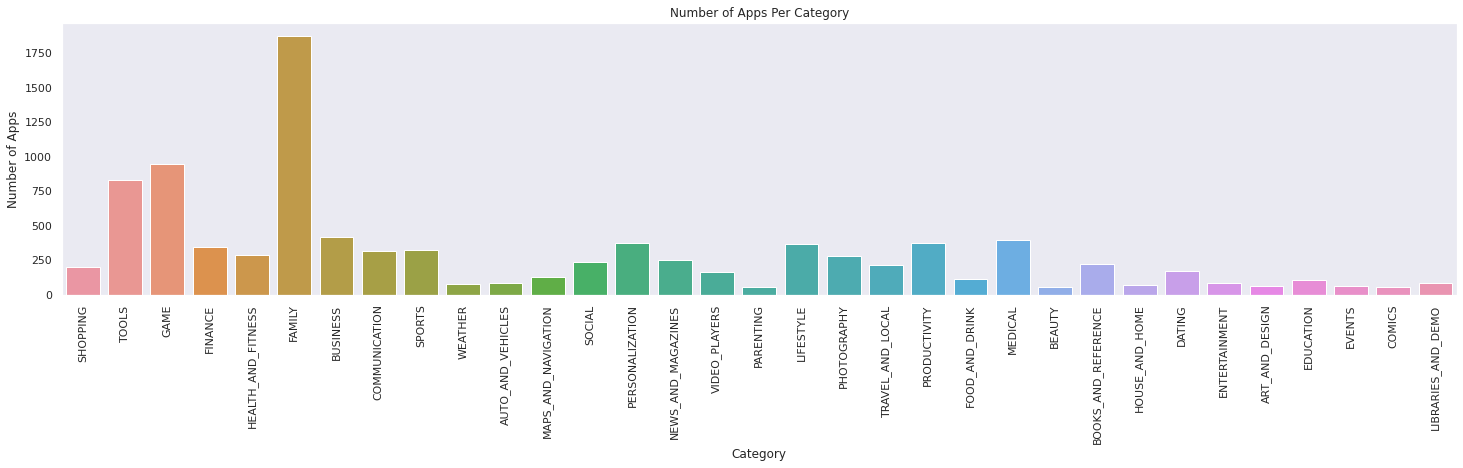

In [222]:
#PLotting Category distribution wrt. no of installs 
sns.set_style('dark')
plt.figure(figsize=(25, 5))
sns.countplot(x='Category', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Family, Game and tools category have the maximum number of applications in the play store 

Q. Which category has the highest number of installs

Text(0.5, 1.0, 'Category Vs Installs')

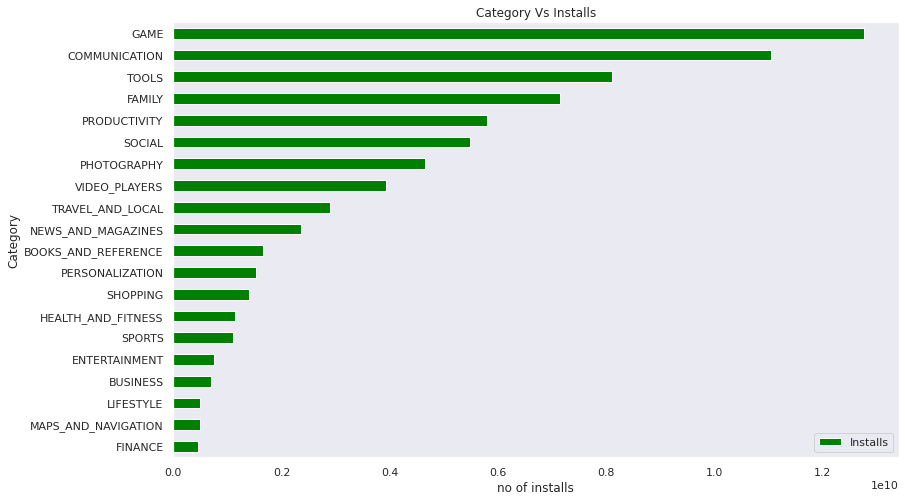

In [223]:
#PLotting  graph for category which has the highest number of installs
ddf.groupby('Category')[['Installs']].sum().nlargest(20,['Installs']).plot.barh(figsize = (13,8), color = 'green').invert_yaxis()
plt.xlabel('no of installs')
plt.title('Category Vs Installs')

*We can visually observe that **Communication, Games** and  **Tools** have the maximum number of downloads.*

**Q. Which category has the highest mean number of installs ?**


Text(0.5, 1.0, 'Category Vs Installs')

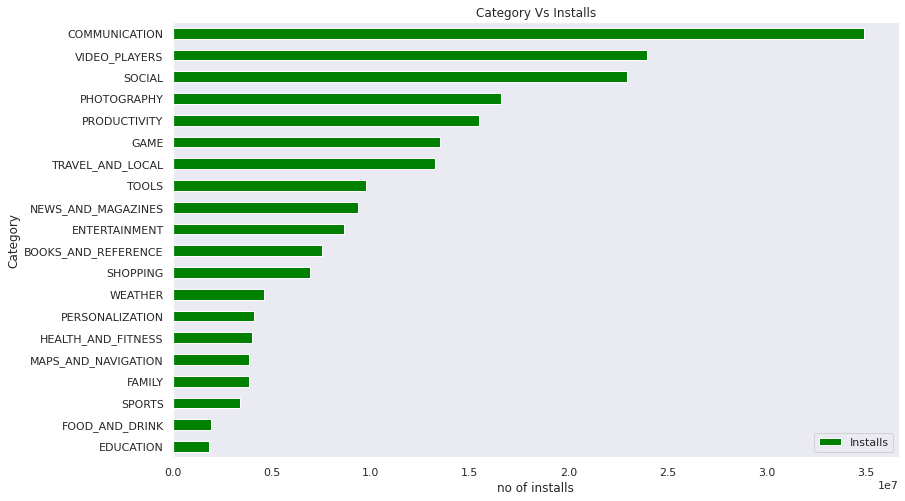

In [224]:
#PLotting  graph for category has the highest mean number of installs
ddf.groupby('Category')[['Installs']].mean().nlargest(20,['Installs']).plot.barh(figsize = (13,8), color = 'green').invert_yaxis()
plt.xlabel('no of installs')
plt.title('Category Vs Installs')

we can observe that communication, video players and games have the maximum number of mean installs.

**Q. Correlate the Category data with Generes and infer the findings.**

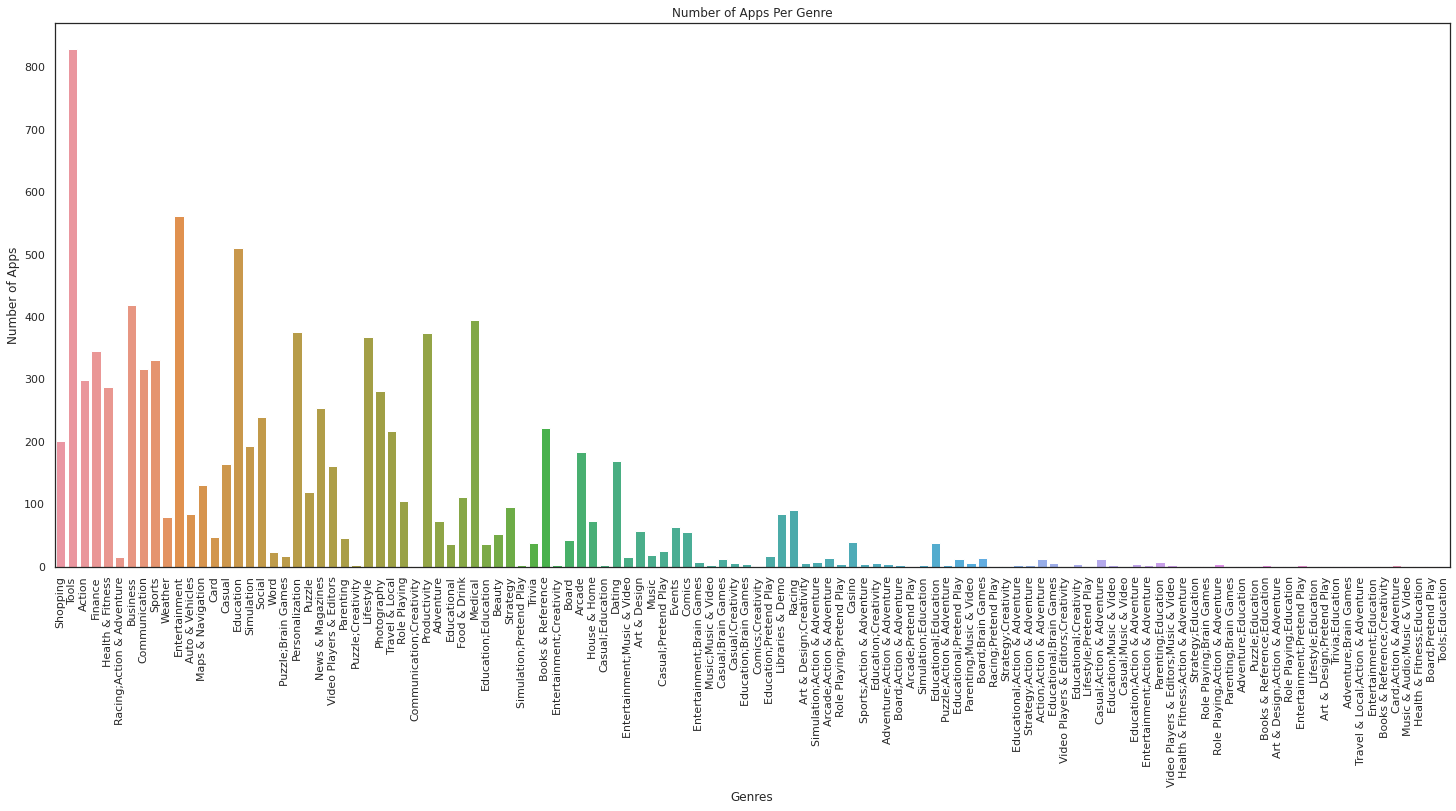

In [225]:
#PLotting  graph for number of apps with category Generes 
sns.set_style('white')
plt.figure(figsize=(25, 10))
sns.countplot(x='Genres', data=ddf)
plt.title('Number of Apps Per Genre')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

*We Observe that **Tools, Entertainment** & **Education** are the top performing apps*



**It will be safe to explore a correlation between entertainment apps for family as it might give us a usefull insight.**

In [226]:
ddf.loc[(ddf['Genres']=='Entertainment') & (ddf['Category']=='FAMILY')].sort_values(by='Installs',ascending=False).describe()

,Rating,Reviews,Size,Installs,Price,Revenue
count,480.000000,4.800000e+02,453.000000,4.800000e+02,480.000000,4.800000e+02
mean,4.119167,8.226341e+04,14.053201,4.744072e+06,3.452292,2.078252e+04
std,0.547386,4.931688e+05,17.810782,4.735310e+07,36.225854,2.703249e+05
min,1.600000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000e+00
25%,3.900000,1.100000e+01,3.300000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,1.635000e+02,7.000000,1.000000e+04,0.000000,0.000000e+00
75%,4.400000,2.602500e+03,17.000000,1.000000e+05,0.000000,0.000000e+00
max,5.000000,7.168735e+06,99.000000,1.000000e+09,399.990000,3.999900e+06


We observe that apps that are ment for entertainment {genre} with  family {category}  rank highly in the number of applications in the google store with a mean rating of 4.1, with mean reviews and installs higher than the 75% value of the respective catagory.

### **3.Content Rating**

**Q. Visualise the rating distribution of the apps**

Text(0.5, 1.0, 'Overall Rating of Apps')

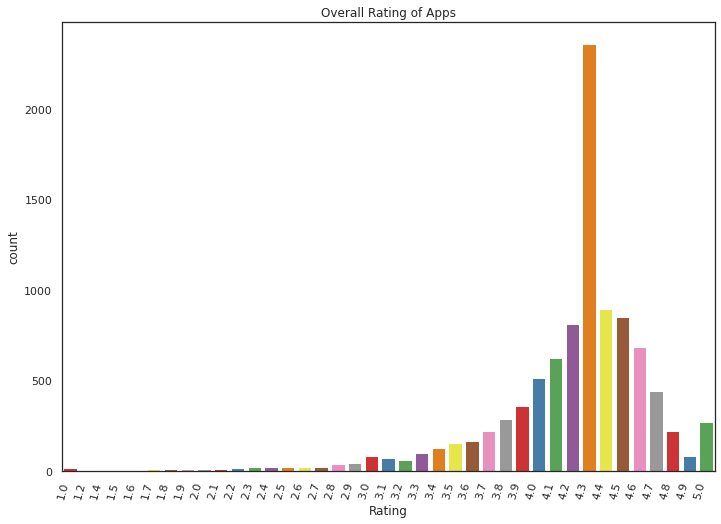

In [227]:
# PLotting graph to Visualise the rating distribution of the apps
rating_distribution = sns.countplot(x="Rating" , data=ddf, palette = "Set1")
rating_distribution.set_xticklabels(rating_distribution.get_xticklabels(), rotation=75, ha="right")
plt.title("Overall Rating of Apps")

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

**Q. .What is the distribution of App's wrt. content rating ?**

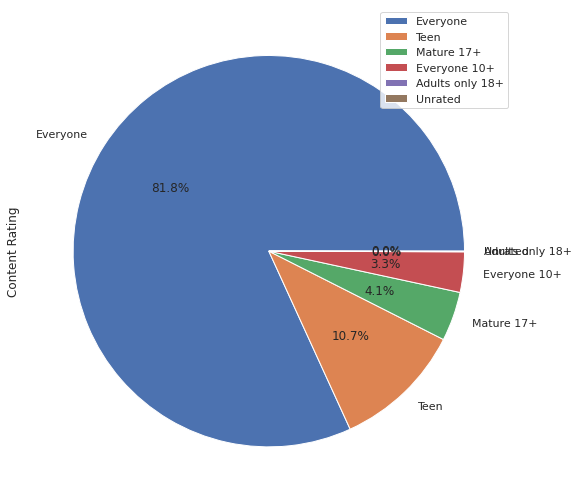

In [228]:
#Plotting pie chart for content rating 
ddf['Content Rating'].value_counts().plot.pie(figsize = (15,9), autopct='%1.1f%%')
plt.legend()

From the above graph we can infer that 81.8% apps are rated for everyone, 10.7 for teens, 4.1% for late teenagers(17+), 3.3% for 10years and above. 

### **4. Application Rating**

**Q. What are the 5 top rated apps**.





In [229]:
ddf[ddf['Rating']==5].shape 

(271, 14)

**We observe that there are 265 app with max rating, we will sort out analysis further by  number of intalls and number of reviews to get a better picture.** 

In [230]:
ddf[ddf['Rating']==5].sort_values(by=['Installs','Reviews'],ascending=False ,ignore_index=True).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0,10000,Free,0.0,Everyone,Entertainment,2017-06-26,1.0.9,4.0,0.0
1,Oración CX,LIFESTYLE,5.0,103,3.8,5000,Free,0.0,Everyone,Lifestyle,2017-09-12,5.1.10,4.1,0.0
2,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,5000,Free,0.0,Everyone,Comics,2018-07-31,1.0.5,5.0,0.0
3,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3.2,5000,Free,0.0,Everyone,Tools,2018-06-13,1.1.3,4.3,0.0
4,Ríos de Fe,LIFESTYLE,5.0,141,15.0,1000,Free,0.0,Everyone,Lifestyle,2018-03-24,1.8,4.1,0.0


We can observe the among the highest rated free app, maximum installs are enjoyed by family {category} application. 

**Q. Plot a graph between Ratings and Install**s 

### **5.Application Reviews**

Q.Which are the Apps with the highest number of reviews?


In [231]:
highest_review=ddf.sort_values(by='Reviews',ascending=False ).head()
highest_review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
360,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,0.0
391,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
1101,Instagram,SOCIAL,4.5,66509917,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
869,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0
2531,Clash of Clans,FAMILY,4.6,44881447,98.0,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1,0.0


Social media and Communication apps are the top 4 most reviewed applications, with facebbok holding the top spot. 

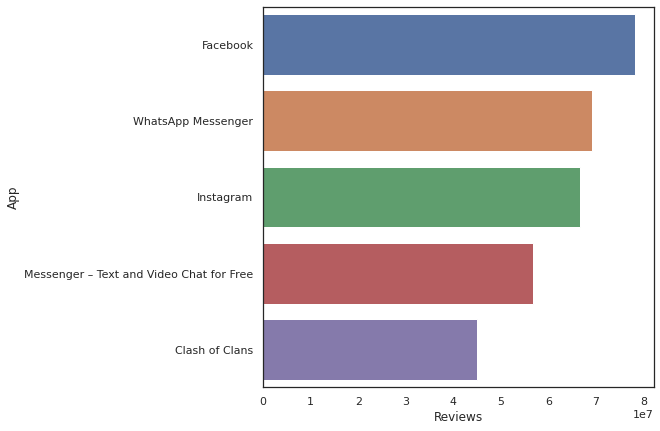

In [232]:
#Plotting applications with highest number of reviews 
top_review_app=highest_review.sort_values("Reviews",ascending=False,ignore_index=True).head(20)
plt.figure(figsize=(7,7))
sns.barplot(x="Reviews",y="App",data=top_review_app);

Visual analysis tells us that facebook is the highest reviewed application.

### **6. Genre**

**Q. Visualise  the Genre of apps with their price.**

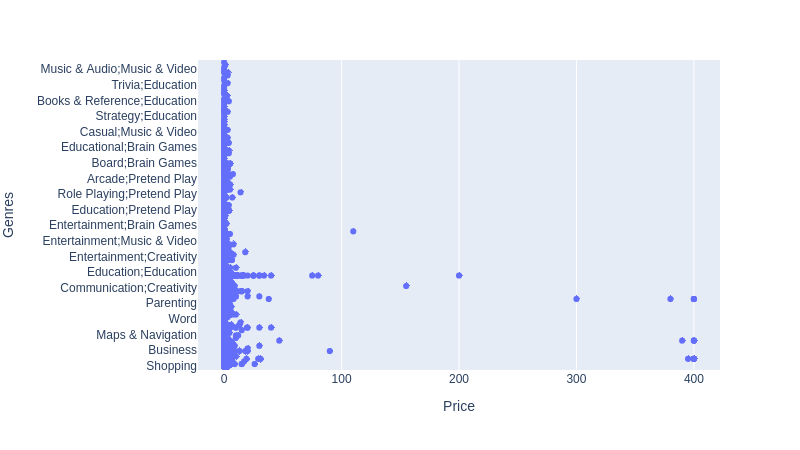

In [233]:
#Plotting Genres with price
fig = px.box(ddf, x="Price", y="Genres", points="all")
gitly.show( fig )

Q **What is the mean number of installs of each Genre**

Text(0.5, 1.0, 'Installs Vs Genres')

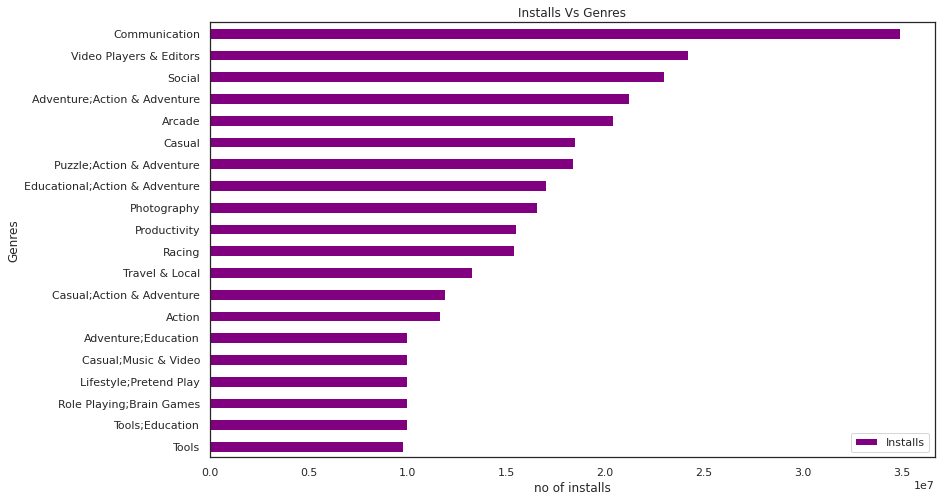

In [234]:
#Plotting Genres with no of installs 
ddf.groupby('Genres')[['Installs']].mean().nlargest(20,['Installs']).plot.barh(figsize = (13,8), color = 'purple').invert_yaxis()
plt.xlabel('no of installs')
plt.title('Installs Vs Genres')

We can observe the that communication, video player & editors and social genres have the maximum number of installs. 

In [235]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Revenue'],
      dtype='object')

Which category of application's have the highest rating? 

Text(0.5, 1.0, 'Rating Vs Category')

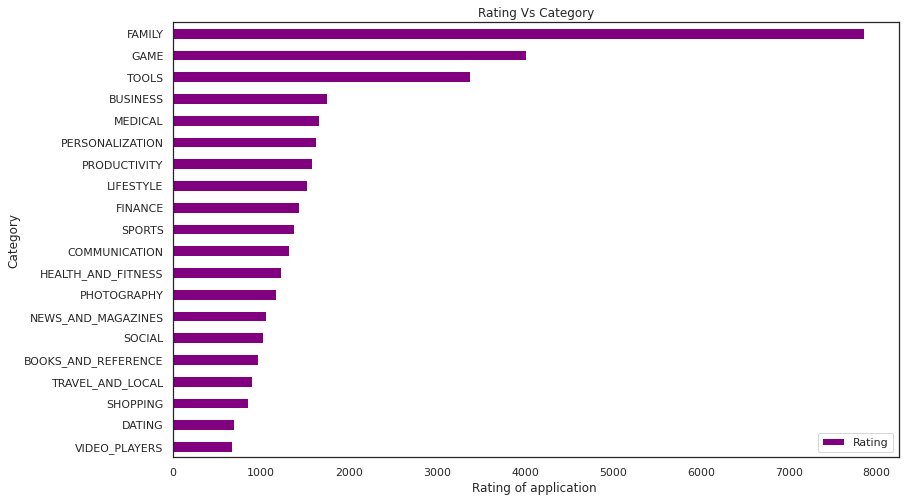

In [236]:
#Plotting Category with Ratings 
ddf.groupby('Category')[['Rating']].sum().nlargest(20,['Rating']).plot.barh(figsize = (13,8), color = 'purple').invert_yaxis()
plt.xlabel('Rating of application ')
plt.title('Rating Vs Category')

**Q. Which genres has the highest number of installs**

Text(0.5, 1.0, 'Installs Vs Genres')

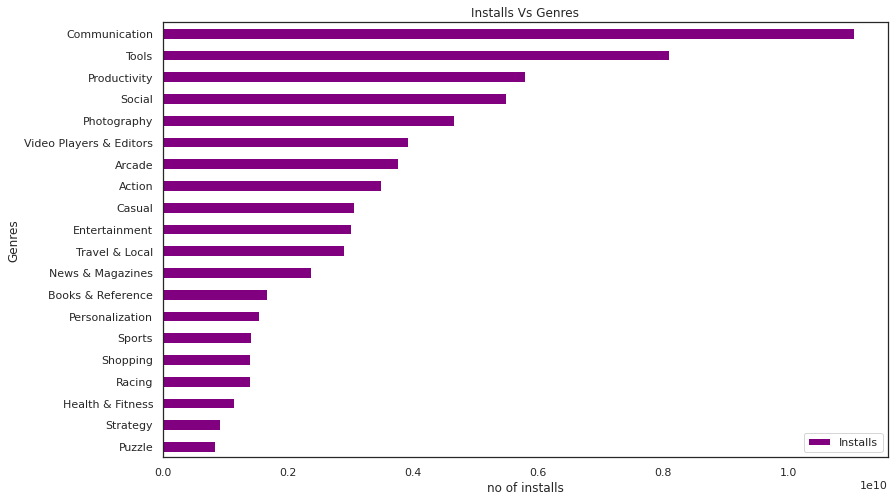

In [237]:
#Plotting Category with Installs 
ddf.groupby('Genres')[['Installs']].sum().nlargest(20,['Installs']).plot.barh(figsize = (13,8), color = 'purple').invert_yaxis()
plt.xlabel('no of installs')
plt.title('Installs Vs Genres')

Mean installs of communication, tools & productivity are the maximum.

### **7.Type**

**Q. What is the ratio of Free app vs Paid app**

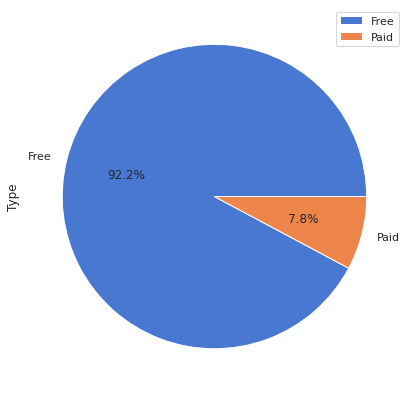

In [238]:
# Plotting pie chart for free and paid apps 
ddf['Type'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%',colors = sns.color_palette('muted'))
plt.legend()

Free vs Paid Apps Pie chart shows that around 92.2% of apps are free whereas only 7.8% are Paid

**Q. Find Realtion between Category of Application and Type**

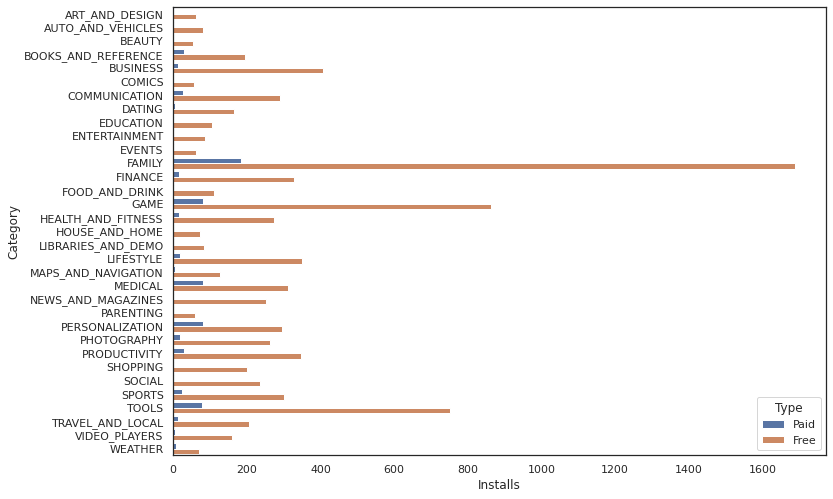

In [239]:
# Plotting bar chart for free and paid apps in diffrent Category  
price = ddf.groupby(['Category','Type'],as_index=False)['Installs'].count()
price=price.sort_values(['Category','Installs'])
sns.barplot(y="Category",x="Installs",hue="Type",data=price)

**Family category has the most free and paid apps we also observe that social apps like entertainment, event, education, comic, and more are always free**

### **8. Installs**

**Q. Which app has highest number of installs, what is the count of apps in the said range?**

In [240]:
print(ddf['Installs'].max())


1000000000


In [241]:
#Sorting Installs Value
print(df[df['Installs']==1000000000].shape)
ddf.sort_values(by=['Installs','Rating','Reviews'],ascending= False).head()

(0, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
1101,Instagram,SOCIAL,4.5,66509917,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
2676,Subway Surfers,GAME,4.5,27724094,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,0.0
159,Google Photos,PHOTOGRAPHY,4.5,10858538,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,0.0
391,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
347,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,0.0


We observe that Instagram, Subsurfers and Google Photos has the highest number of installs

**Q. Plot a graph showing relation between no of Installs and Reviews**

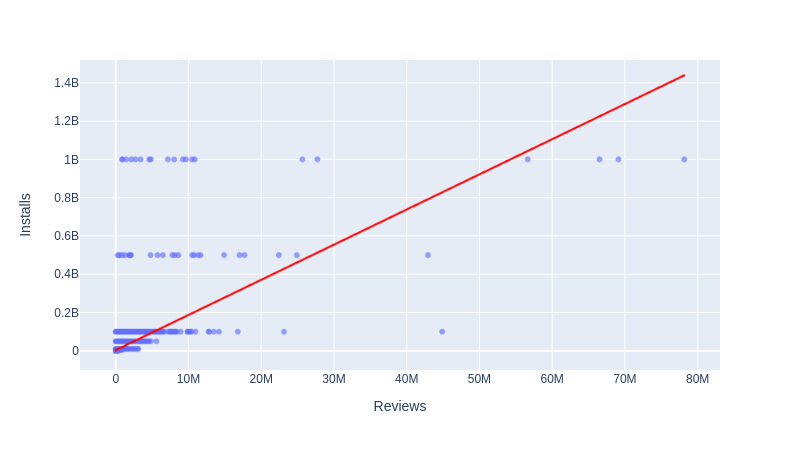

In [242]:
#PLotting graph between Rating and intalls 
df = px.data.tips()
fig = px.scatter(
    ddf, x='Reviews', y='Installs', opacity=0.65,
    trendline='ols', trendline_color_override="red",width=700, height=400
)
gitly.show( fig )

From the above regression plot we can see that Reviews and Installs are positively correlated means as the number of installs increases the number of reviews also increases

### **9.Last Updated**	

**Q What could be the approximate date of creation of this dataset** 

In [243]:
print('Date of application which was last updated:',ddf['Last Updated'].max())


Date of application which was last updated: 2018-08-08 00:00:00


In [244]:
print('Date of application which was last updated:',ddf['Last Updated'].min())

Date of application which was last updated: 2010-05-21 00:00:00


### **10. Android Ver**

 **Q. How many apps that can work on android version 4.2**

In [245]:
android_ver=ddf[ddf['Android Ver']=='4.2']
android_ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
4,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2,7990.0
5,Fun Kid Racing - Motocross,FAMILY,4.1,59768,NaN,10000000,Free,0.00,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2,0.0
12,CHOSEN - EV Smart Charger,AUTO_AND_VEHICLES,4.3,1,19.0,10,Free,0.00,Everyone,Auto & Vehicles,2018-08-07,3.4.4,4.2,0.0
39,Beauty and the Beast,FAMILY,4.4,70883,31.0,1000000,Free,0.00,Everyone,Puzzle;Creativity,2018-08-07,1.7.6,4.2,0.0
40,Scoreboard FR,LIFESTYLE,4.3,3,15.0,100,Free,0.00,Everyone,Lifestyle,2018-08-07,2.1,4.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,The Lost Lands:DH Lite,FAMILY,4.3,1130,48.0,50000,Free,0.00,Teen,Simulation,2015-04-03,1.01,4.2,0.0
9311,el,FAMILY,4.3,32405,47.0,1000000,Free,0.00,Everyone,Casual,2014-12-18,1.2.1,4.2,0.0
9363,Moto LED for Moto X & E [Root],LIFESTYLE,3.4,4082,0.3,500000,Free,0.00,Everyone,Lifestyle,2014-10-16,1.0,4.2,0.0
9369,Jabbla BT,TOOLS,5.0,3,0.1,100,Free,0.00,Everyone,Tools,2014-10-06,1.0,4.2,0.0


### **11. Size**

**Q. Visualise Size vs No. of Apps plot and determine the Size bracket with maximum number of Apps.** 

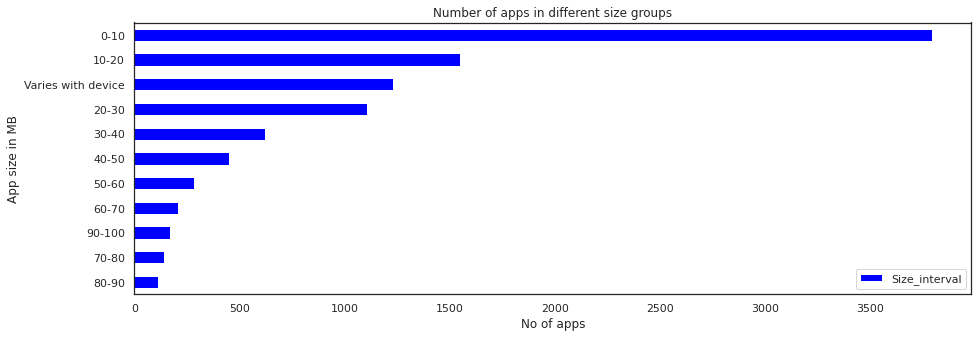

In [246]:
# We are creating a Size_df to plot a size interval and value graph. 
Size_df = ddf.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')
Size_df2 = Size_var.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')

#Dropping null values from the size 
Size_df.dropna(inplace =True)

# Creating a Size_interval column 
Size_df.loc[(Size_df['counts']>=0 ) & (Size_df['counts']<=10),'Size_interval' ] = '0-10'
Size_df.loc[(Size_df['counts']>=10) & (Size_df['counts']<=20),'Size_interval' ] = '10-20'
Size_df.loc[(Size_df['counts']>=20) & (Size_df['counts']<=30),'Size_interval' ] = '20-30'
Size_df.loc[(Size_df['counts']>=30) & (Size_df['counts']<=40),'Size_interval' ] = '30-40'
Size_df.loc[(Size_df['counts']>=40) & (Size_df['counts']<=50),'Size_interval' ] = '40-50'
Size_df.loc[(Size_df['counts']>=50) & (Size_df['counts']<=60),'Size_interval' ] = '50-60'
Size_df.loc[(Size_df['counts']>=60) & (Size_df['counts']<=70),'Size_interval' ] = '60-70'
Size_df.loc[(Size_df['counts']>=70) & (Size_df['counts']<=80),'Size_interval' ] = '70-80'
Size_df.loc[(Size_df['counts']>=80) & (Size_df['counts']<=90),'Size_interval' ] = '80-90'
Size_df.loc[(Size_df['counts']>=90) & (Size_df['counts']<=100),'Size_interval'] ='90-100'

#Creating a column for Size_interval for 'Varies with device' DataFrame
Size_df2['Size_interval']=Size_df2['counts']

# Appending the 'Varies with device' DataFrame
Size_df=Size_df.append(Size_df2).reset_index()

# PLotting a size interval graph
Size_df['Size_interval'].value_counts().plot.barh(figsize=(15,5), color='Blue').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

Majority of applications have a size between 0-10MB

### **12.Correlation**


 **Q. Is there a correlation between rating, Reviews, Size with the price of the app**

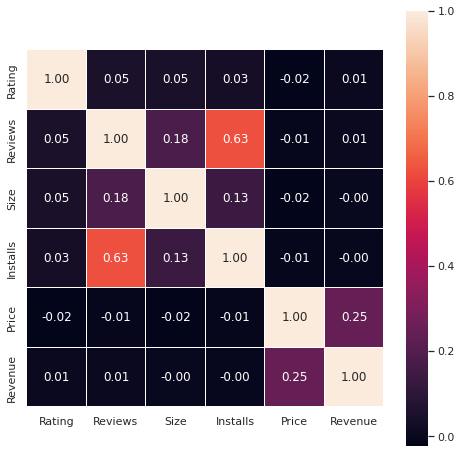

In [247]:
#Plotting correlation Heatmap 
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(ddf.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

We observe that Installs and Reviews are positively correlated means if the number of installs increases simultaneously reviews will also increase

### **13. Outliers**
Analyse box ploat discover key factors responsible for app engagement and success.

**Q Analyse box plot for price**

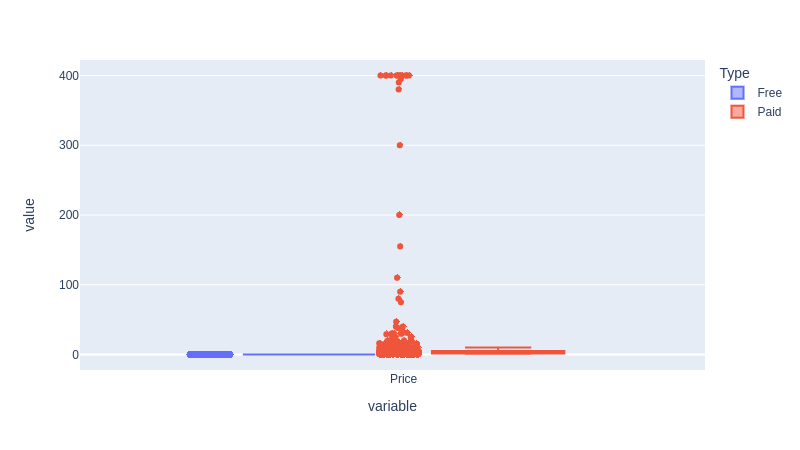

In [248]:
#Box plot for price attribute
x=['Price']
fig = px.box(ddf, y=x,points="all",color="Type")
gitly.show( fig )

Most expensive application of the Dataset is $$400, majority of paid applications lie between 0-$ 30 range.

**Q. Analyse box plot for price**

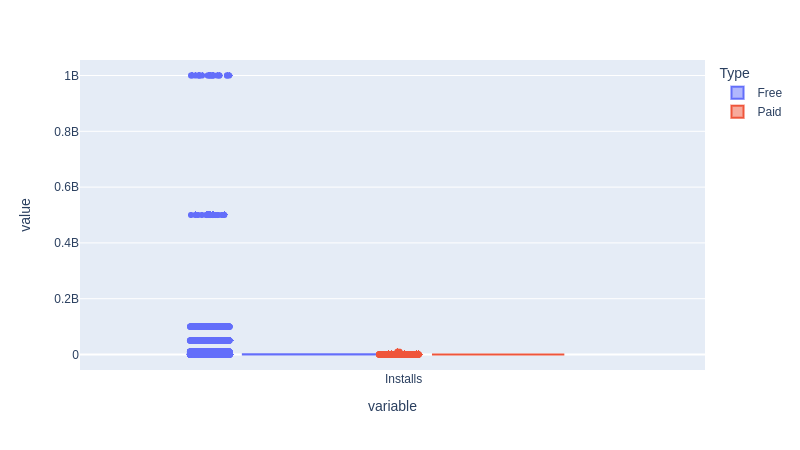

In [249]:
#Box plot for Installs attribute
x=['Installs']
fig = px.box(ddf, y=x,points="all",color="Type")
gitly.show( fig )

Free application show very high number of installs and dawrfs paid application numbers.

Q. **Analyse box plot for Size**

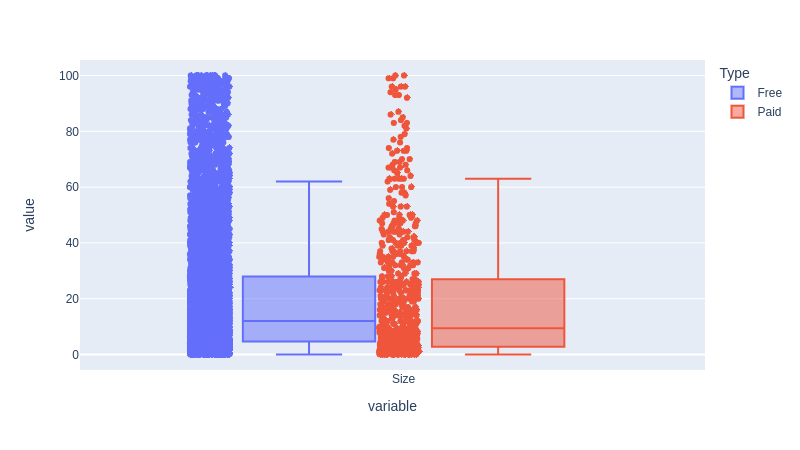

In [250]:
#Box plot for Size attribute
x=['Size']
fig = px.box(ddf, y=x,points="all",color="Type")
gitly.show( fig )

**Q. Analyse box plot for Rating**

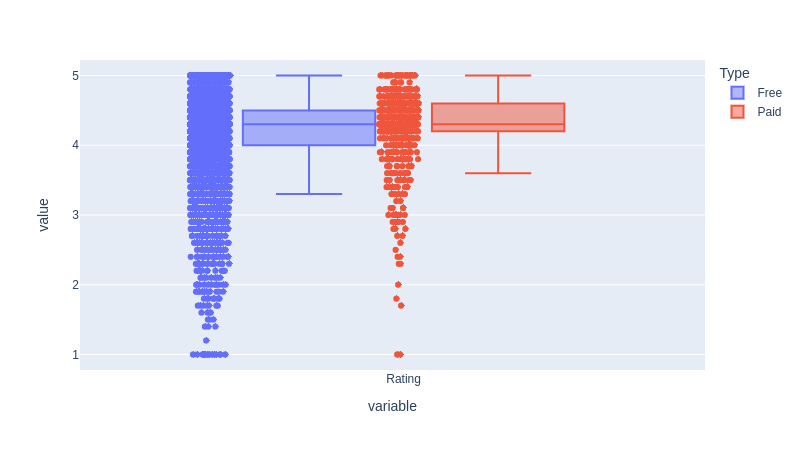

In [251]:
#Box plot for Rating attribute
x=['Rating']
fig = px.box(ddf, y=x,points="all",color="Type")
gitly.show( fig )

Paid apps generally have high rating. 

**Q. Analyse box plot for Reviews**

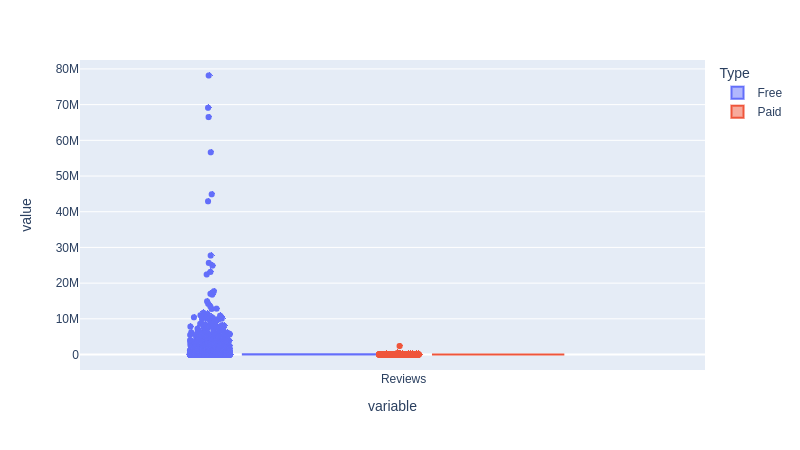

In [254]:
#Box plot for Reviews attribute
x=['Reviews']
fig = px.box(ddf, y=x,points="all",color="Type")
gitly.show( fig )

***************


# **D. Play Store Sentiment Analysis**
### Description of App Dataset column

**Translated_Review :** *is the process of assessing translations after they've been completed to ensure quality, consistency, tone, and style*

**Sentiment :** *technique used to determine whether data is positive, negative or neutral. *

**Sentiment_Polarity :** *Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.*

**Sentiment_Subjectivit :**	*Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].*

In [255]:
#Reading the .csv file
df_sentiment=pd.read_csv('/content/drive/MyDrive/Almabetter Projects /Google Play Store /Playstore Data /User Reviews.csv')

### **1. Overview of data** 

In [256]:
##Top five rows of the column 
df_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [257]:
# Random 5 rows
df_sentiment.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
16719,Blur Image Background,It aright,Neutral,0.000000,0.000000
10909,BLK - Swipe. Match. Chat.,Need members need let see full profile .some cut,Positive,0.350000,0.550000
6843,American Airlines,"When I needed most, kept closing reopen even r...",Positive,0.500000,0.500000
60894,Helix Jump,I got game kids I loved it. But hated constant...,Negative,-0.200000,0.470370
54117,GoPro (formerly Capture),"Can't connect GoPro Fusion, another gopro, fun...",Negative,-0.147135,0.639583


In [258]:
#last five rows of the data
df_sentiment.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [259]:
#Rows and column of our data 
df_sentiment.shape

(64295, 5)

In [260]:
# Statistical overview
df_sentiment.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# **E. Data Cleaning**

### **1.Duplicate values**

In [261]:
df_sentiment[df_sentiment['Translated_Review'].duplicated()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [262]:
'''Dropping duplicate values'''

#Length of original Dataframe 
before = len(df_sentiment.index)                                                   
print('Total entries with duplicates were '+ (str(before)))

#Drop duplicates with a value in a specific column.
df_sentiment.drop_duplicates( keep='first', inplace=True, ignore_index=True) 

#Length of duplicated Dataframe       
after = len(df_sentiment.index)                                                                             
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 64295
Total entries after duplicates were dropped are 30679
Total 33616 entries were dropped.


### **2.Null values**

In [263]:
#Checking the null values 
df_sentiment[df_sentiment['Sentiment'].isnull()].sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
18714,Ebook Reader,NaN,NaN,NaN,NaN
21397,Fast News,NaN,NaN,NaN,NaN
10039,"BuzzFeed: News, Tasty, Quizzes",NaN,NaN,NaN,NaN
626,8 Ball Pool,NaN,NaN,NaN,NaN
18905,Endless Numbers,NaN,NaN,NaN,NaN
9130,Bowmasters,NaN,NaN,NaN,NaN
13362,ColorFil - Adult Coloring Book,NaN,NaN,NaN,NaN
24642,GMX Mail,NaN,NaN,NaN,NaN
24705,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",NaN,NaN,NaN,NaN
29771,Hitwe - meet people and chat,NaN,NaN,NaN,NaN


Since null values range accross entire rows. we can confidently drop them 

In [264]:
'''Dropping the null values'''

 #Length of original Dataframe 
before = len(df_sentiment.index)                                                
print('Total entries with null values were '+ (str(before)))

#Drop duplicates with a value in a specific column.
df_sentiment.dropna(inplace=True)
  
#Length of null values Dataframe 
after = len(df_sentiment.index)                                                
print('Total entries after null values dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')


Total entries with null values were 30679
Total entries after null values dropped are 29692
Total 987 entries were dropped.


#**F. Exploratory Data Analysis**

### **1. Sentiment and Sentiment Subjectivity**

In [265]:
import plotly.graph_objects as go

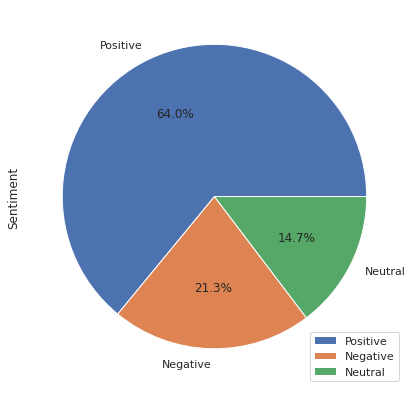

In [266]:
# Plotting a Pie chart for distribution visualisation 
df_sentiment['Sentiment'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%')
plt.legend()

64% of people have positive, 21.3% negative and 14.7% have neutral  sentiment

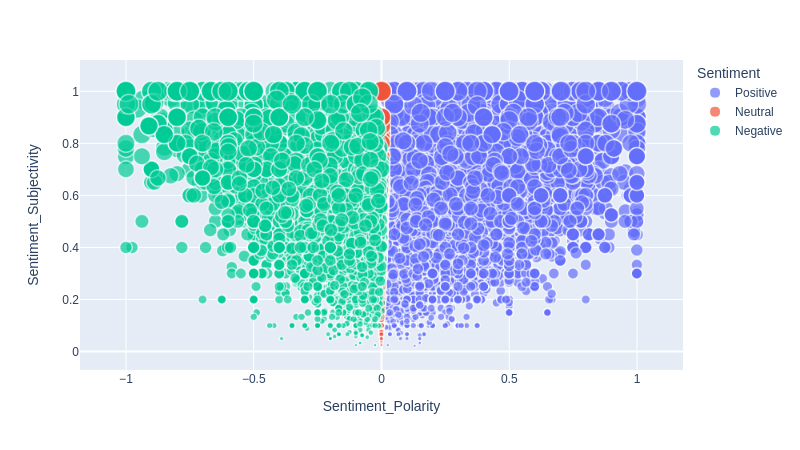

In [267]:
''' Importing important library ''' 

from pandas._libs.hashtable import value_count
import plotly.graph_objects as go
import plotly.express as px
# Plotting a scattergraph 
fig = px.scatter(df_sentiment, x="Sentiment_Polarity", y="Sentiment_Subjectivity", color="Sentiment",
                 size='Sentiment_Subjectivity', hover_data=['App'])
gitly.show( fig )

64% of people have positive, 21.3% negative and 14.7% have neutral  sentiment

In [268]:
# Number of people having positive sentiment 
positive_reviews=df_sentiment[df_sentiment['Sentiment']=='Positive']
positive_reviews.shape

(19015, 5)

Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

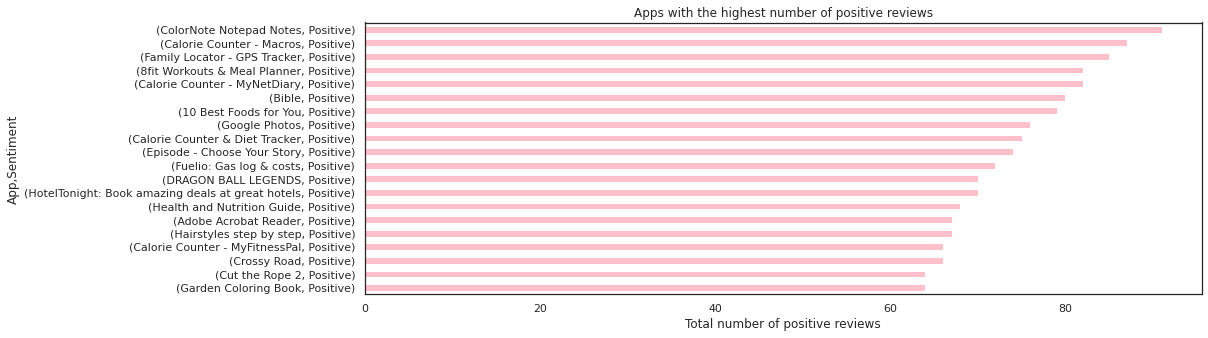

In [269]:
# Apps with the highest number of positive reviews
positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='pink').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

### **2.Sentiment Polarity**

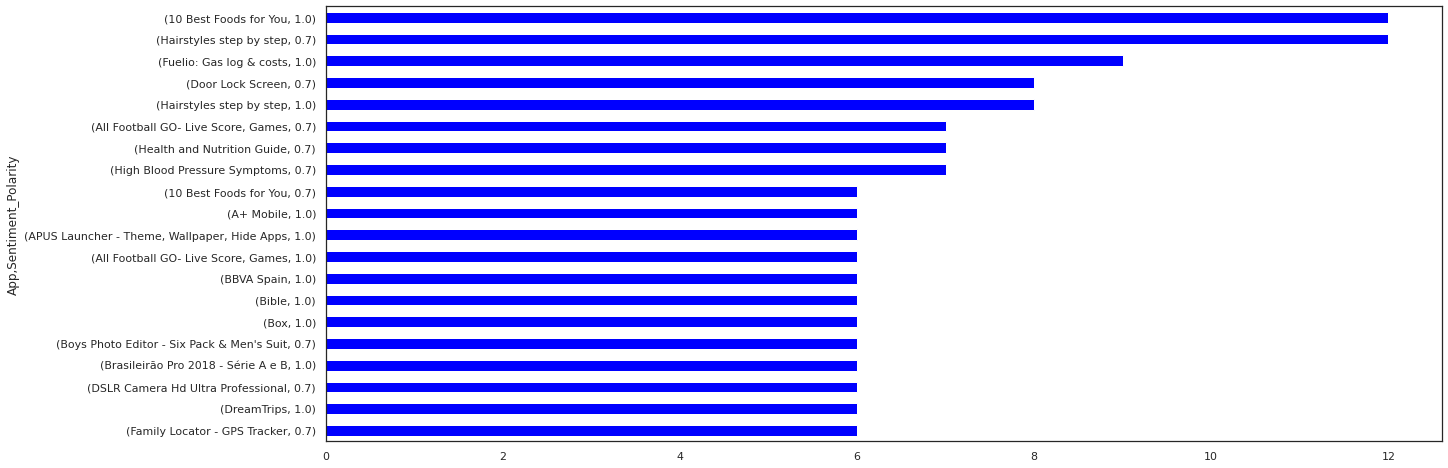

In [270]:
# DataFrame with Apps of high Sentiment_Polarity
highest_sp=df_sentiment[df_sentiment['Sentiment_Polarity']>=0.7]

# Apps with the high Sentiment_Polarity
highest_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='blue').invert_yaxis()

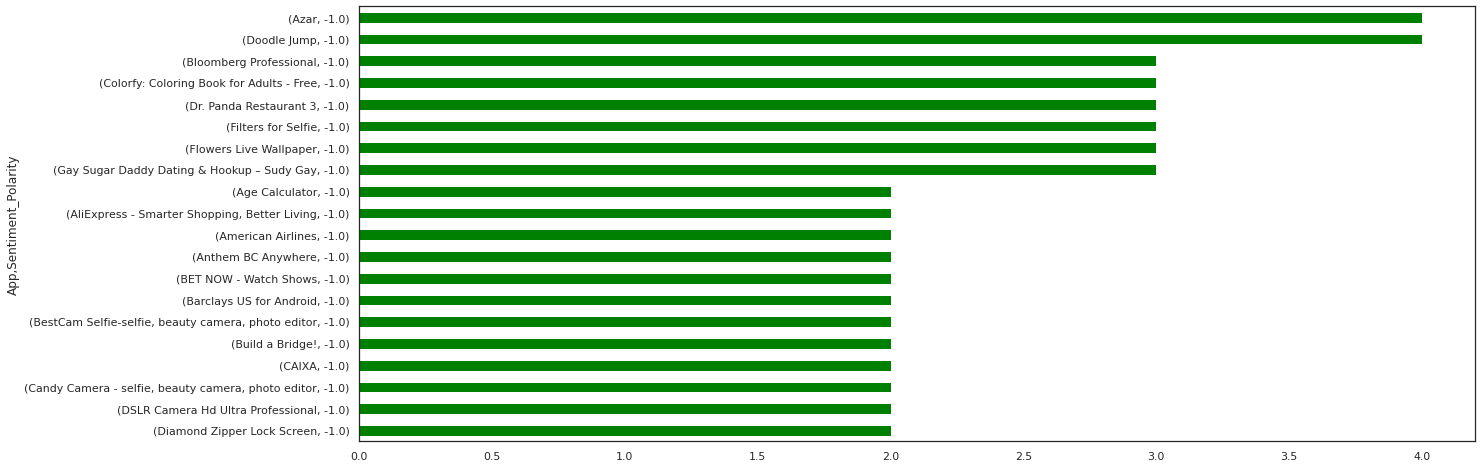

In [271]:
# DataFrame with Apps of low Sentiment_Polarity
minimum_sp=df_sentiment[df_sentiment['Sentiment_Polarity']==-1 ]
# Apps with the lowest Sentiment_Polarity
minimum_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='green').invert_yaxis()

### **3.Translated_Review**

In [272]:
''' Importing important library ''' 
from wordcloud import WordCloud, STOPWORDS

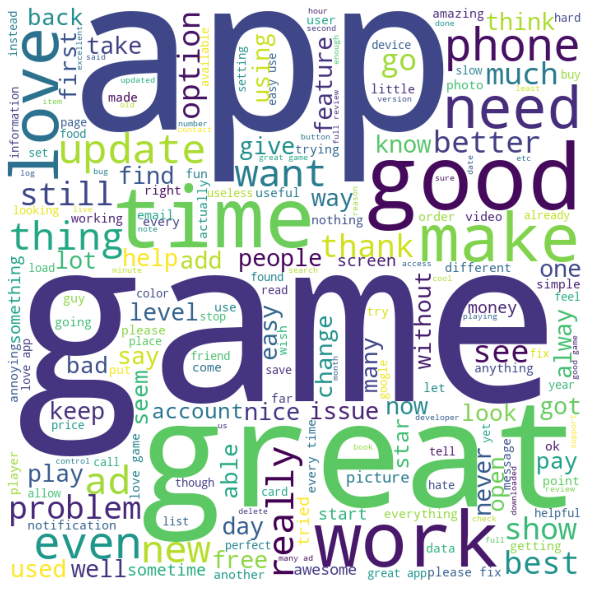

In [273]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_sentiment.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Words sucha as 'game', 'app','work', 'time', 'good', 'phone' ,'make', 'love' and various others are used very often 

# **G. Combined analysis** 

In [274]:
# Combining the two Datasets by using merge command.
df_combine=pd.merge(ddf,df_sentiment,on ='App')

#Looking at 5 random values from the data set. 
df_combine.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
13087,Coloring & Learn,FAMILY,4.4,12753,51.0,5000000,Free,0.0,Everyone,Educational;Creativity,2018-07-17,1.49,4.0.3,0.0,Quite good effort,Positive,0.700000,0.600000
22662,Happy Street,FAMILY,4.5,110877,NaN,1000000,Free,0.0,Everyone 10+,Casual;Action & Adventure,2018-03-28,Varies with device,Varies with device,0.0,My game data disappeared. My data supposed sav...,Negative,-0.128571,0.228571
12221,Fishdom,GAME,4.6,2157930,NaN,10000000,Free,0.0,Everyone,Puzzle,2018-07-19,2.21.5,4.0.3,0.0,"Loved game, never got bored updating June 2018...",Negative,-0.020000,0.620000
4365,Airbnb,TRAVEL_AND_LOCAL,4.4,359560,NaN,10000000,Free,0.0,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device,0.0,Took 2 hours register take photo drivers licen...,Negative,-0.016667,0.533333
22132,Candy Smash,FAMILY,4.5,11436,15.0,1000000,Free,0.0,Everyone,Casual;Brain Games,2018-04-17,2.2.3169,4.0.3,0.0,It's childish,Negative,-0.200000,0.800000


Q. Visualise the sentiment distribution for various Category of Apps. 

Text(0, 0.5, '')

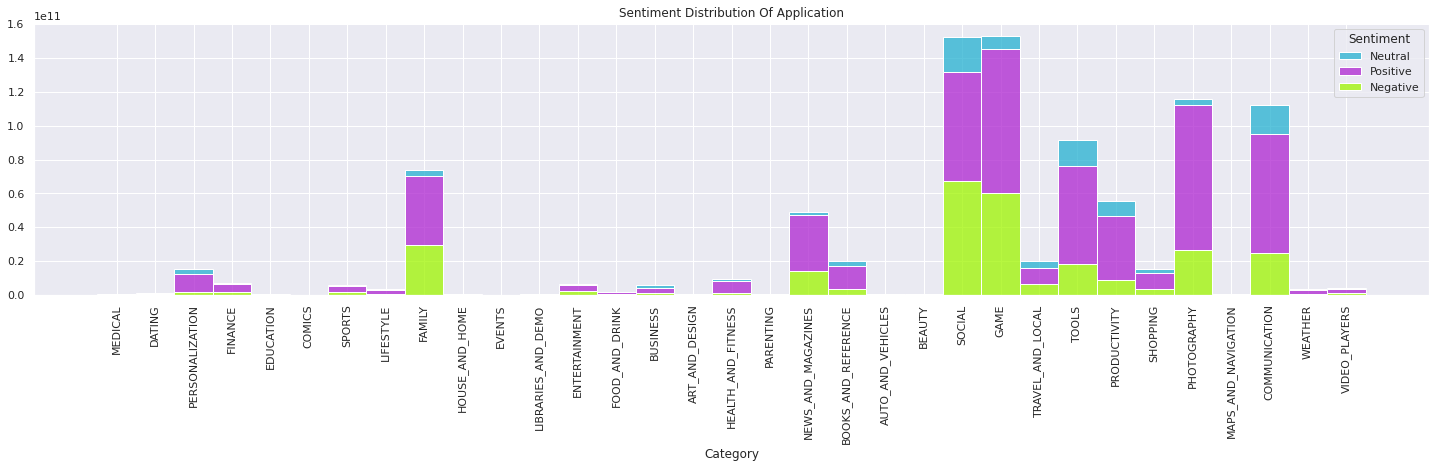

In [275]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(25, 5))
sns.set( style = "darkgrid" ),  

ax = sns.histplot(
    #sns.set( style = "dark" ),  
    df_combine.sort_values(by='Installs'),                    
    x='Category',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='Installs',
    hue='Sentiment',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1','#9ff500'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    #shrink=0.8
    
)
plt.xticks(rotation=90)

ax.set_title('Sentiment Distribution Of Application')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

Q How does Sentiment Subjectivity and Sentiment_Polarity correlate with the ratings of the app ?

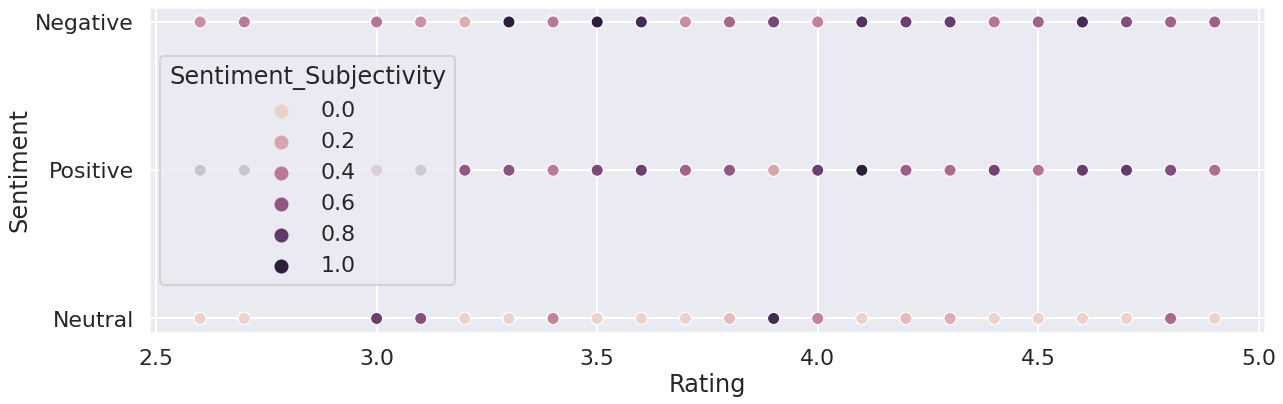

In [276]:
#Sactterplot of Sentiment wrt to Rating of the application with  Sentiment_Subjectivity
sns.set_context("poster")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_combine, x="Rating", y="Sentiment", hue="Sentiment_Subjectivity") 




1.   When the sentiment is negative,  ratings are low the subjectivity observed is on the lower side  

 
   

2.   When the sentiment is negative, ratings are high the subjectivity observed is high.

 

3. When the sentiment is positive, ratings are low the subjectivity observed is high  

    
    

4. When the sentiment is positive, ratings are high the subjectivity observed is on the higher side.   

  












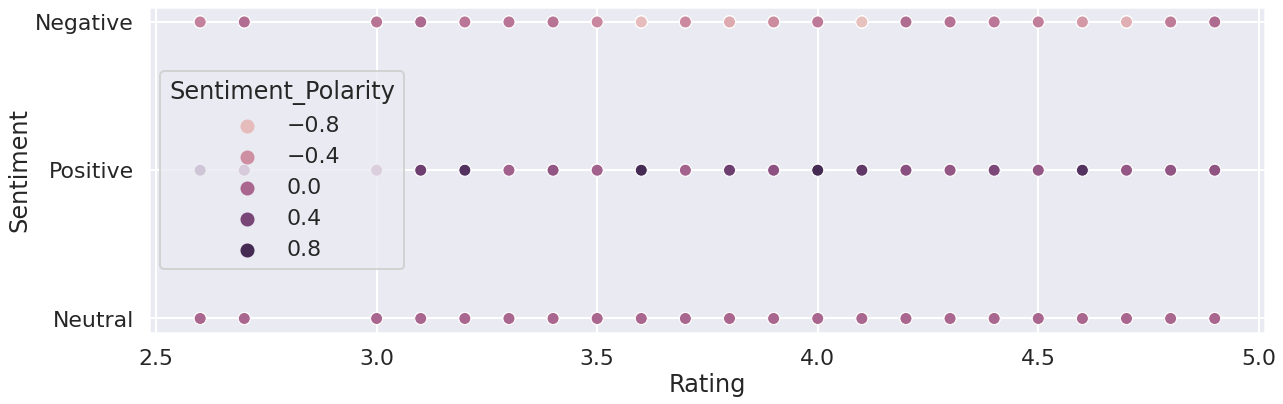

In [277]:
#Sactterplot of Sentiment wrt to Rating of the application with  Sentiment_Polarity
sns.set_context("poster")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_combine, x="Rating", y="Sentiment", hue="Sentiment_Polarity") 


1.   When the polarity towards and application is negative and ratings are low the polarity observed is on the higher negative side     

2.   When the polarity towards and application is negative and ratings are high the polarity observed is on the lower negative side .


3. When the polarity towards and application is positive and ratings are low the polarity observed is on the higher positve side.    
    

4. When the polarity towards and application is positive and ratings are high the polarity observed is observed on the higher positve side .   




Hence we can say that that the sentiment analysis done on the reviews follows the trend of the ratings. With high rating we observe high ploarity and  subjectivity, with low rating we observe low polarity andsubjectivity 

# **H. Analysis Summary** 


*   i'm Rich - Trump Edition is the most expensive application with 10000 installs.
*   Total sale amount from google play store is $ 291,123,534.52.
*   **Communication, Games** and  **Tools** have the maximum number of downloads.*
*   Communication, video players and games have the maximum number of mean installs. 
*   We can observe the that communication, video player & editors and social genres have the maximum number of installs.
*   Mean installs of communication, tools & productivity are the maximum.



*   Entertainment Apps {genre} with family {category} rank highly in the number of applications in the google store with a mean rating of 4.1, with mean reviews and installs higher than the 75% value of the respective catagory.
*   Most of the apps in the Play Store have a rating between 4 and 4.7.
*   81.8% apps are rated for everyone, 10.7 for teens, 4.1% for late teenagers(17+), 3.3% for 10years and above.
*   Among the highest rated free app, maximum installs are enjoyed by family {category} application.
*   64% of people have positive, 21.3% negative and 14.7% have neutral  sentiment
*   Words sucha as 'game', 'app','work', 'time', 'good', 'phone' ,'make', 'love' and various others are used very often 
*  Social media and Communication apps are the top 4 most reviewed applications, with facebook holding the top spot.
*  92.2% of apps are free whereas only 7.8% are Paid
*   Family category has the most free and paid apps, we also observe that social apps like entertainment, event, education, comic, and more are always free
*   We observe that Instagram, Subsurfers and Google Photos has the highest number of installs

*   Majority of paid applications lie between 0-$ 30 range.



# **I. key factors responsible for app engagement and success**



*   Apps that are rated for family and are of the games catagory perfore well. 
*   Best price range for  of an application is between 0-30$. 
*   Facebook dominate social media application Install, with it Subsidaries it holds the top 4 out of 5 spots 
*   Apps which are initially free to download see more downloads, its better to keep in-app purchases than have an upfront cost to download.
*   Commuication application perform and see highest number of downloads across all Categories and Genres. 








# **J. logical inconsistency**

The data was checked for logical inconsistency as follows.

1.   Ratings.

The ratings where checked to be between 1-5, one outlier was observed, it was observed that this outlier had shifted values, hence unambiguity in data. The data in the row was rearranged. 

2.   Reviews Vs. Installs

It is quite obvious that reviews of an application cannot be more than the no of downloads, Hence any data which showed such inconsistency is removed. 

3. Removal of duplicate values 
Before removal we arranged the data by last date, and keeping the last update of the duplicate values 
